In [1]:
import sklearn
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras



2024-02-29 10:22:04.138272: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-29 10:22:04.140790: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-29 10:22:04.176351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 10:22:04.176378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 10:22:04.177376: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 300)
pd.set_option("display.precision", 5)
pd.set_option("display.max_seq_items", 50)
pd.set_option("display.max_seq_items", 50)


In [3]:
keras.backend.clear_session()

1. load data

In [4]:
training_labels_path = "/home/t.afanasyeva/MAT_rnaseq/gene_counts/20240224_labels_138_samples.csv"
training_data_path  = "/home/t.afanasyeva/MAT_rnaseq/gene_counts/20240224_training_data_138_samples.csv"

In [5]:
training_data = pd.read_csv(training_data_path, index_col='Unnamed: 0')
training_labels = pd.read_csv(training_labels_path, index_col='Unnamed: 0')

In [6]:
training_data.shape,training_labels.shape

((138, 47698), (138, 1))

In [7]:
path = "/home/t.afanasyeva/MAT_rnaseq/gene_counts/20240224_complete_dataset_273_samples.csv"
data = pd.read_csv(path, index_col='Unnamed: 0')

In [8]:
data.shape

(273, 47698)

In [9]:
# data.T.describe()

In [10]:
list(set(data.index))

['MD249_7128_contaminated_nanogam_8',
 'MD214_7121_IMDM_2',
 'BA046_7128_MPLA_8',
 'BA059_7128_R848_11',
 'MD215_7115_LPS_1',
 'MD219_7128_IMDM_1',
 'BA029_7128_IMDM_02',
 'BA060_7128_LPS-R848_17',
 'BA063_7128_CRX-527_27',
 'MD220_7128_HKSA_2',
 'MD251_7128_CL307_21',
 'MD249_7128_cleared_nanogam_10',
 'MD251_7128_LPS_2',
 'BA063_7128_IMDM_2',
 'MD211_7100_IMDM_1',
 'BA028_7128_IMDM_02',
 'MD214_7121_Pam3_3',
 'MD220_7128_LPS_2',
 'MD220_7128_HKSA_3',
 'BA060_7128_Pam3-PGN_7',
 'MD218_7115_Fla-PA_3',
 'MD250_7128_LPS_3',
 'BA063_7128_TL8_12',
 'MD211_7100_R848_3',
 'MD251_7128_HKEB_15',
 'MD220_7128_IMDM_2',
 'MD215_7115_R848_2',
 'MD224_7115_R848-low_1',
 'MD251_7128_HKEB_14',
 'MD251_7128_PGN_10',
 'MD216_7086_R848-low_3',
 'MD224_7128_Pam3_1',
 'BA042_7128_LPS_5',
 'BA042_7128_CL8_15',
 'BA060_7128_LPS-R848_19',
 'MD216_7100_Fla-PA_1',
 'MD249_7128_LPS_4',
 'MD220_7128_HKEB_1',
 'BA060_7128_IMDM_2',
 'MD218_7121_Fla-PA_2',
 'MD218_7115_Fla-PA_1',
 'BA059_7128_cAlb_15',
 'MD251_7128

In [11]:


# df_subset = data[data.index.str.contains('HKSA|HKEB')]

# df_subset = data[data.index.str.contains('nanogam')]

df_subset = data[data.index.str.contains('Pam3-PGN|LPS-PGN|Pam3-R848')]

In [12]:
df_subset

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4F5,LOC124903816,LOC124900384,LOC729737,...,ND4,TRNH,TRNS2,TRNL2,ND5,ND6,TRNE,CYTB,TRNT,TRNP
BA060_7128_Pam3-R848_09,2,239,4,0,0,0,0,0,16,236,...,43377,11,8,18,31810,5527,44,30384,3,535
BA060_7128_Pam3-R848_10,1,175,6,0,0,0,0,0,17,190,...,36864,12,6,16,27557,5095,35,25894,3,434
BA060_7128_Pam3-R848_11,0,268,3,0,0,0,0,3,17,308,...,48858,7,9,18,36851,5146,49,34605,7,603
BA060_7128_LPS-PGN_13,0,232,4,1,0,0,0,0,10,272,...,39061,10,4,14,28877,5343,33,26982,7,523
BA060_7128_LPS-PGN_14,0,231,4,0,0,0,0,3,23,268,...,45214,9,9,18,32519,5896,32,32171,5,596
BA060_7128_LPS-PGN_15,0,387,7,0,0,0,0,0,22,424,...,68165,17,9,22,49658,11641,47,45407,8,837
BA060_7128_Pam3-PGN_5,2,258,7,0,0,0,0,1,18,262,...,37697,8,9,19,28878,4645,22,27896,11,527
BA060_7128_Pam3-PGN_6,0,143,2,0,0,0,0,2,9,152,...,27726,4,2,3,21244,3041,9,18672,2,347
BA060_7128_Pam3-PGN_7,0,241,6,0,0,0,0,0,6,254,...,46255,14,11,12,32684,7960,44,32163,12,608
BA060_7128_LPS-PGN_16,0,100,0,0,0,0,0,1,3,106,...,19917,2,2,13,15192,4484,13,14048,0,271


In [13]:
test_labels = []
for i in df_subset.index:
    test_labels.append(i.split("_")[2])
y_test = test_labels


In [14]:
X_test = df_subset.reset_index(drop=True)

training_data = training_data.reset_index(drop=True)
training_labels = training_labels.reset_index(drop=True)



1.3 Add Feature selection

1.1. Add SMOT

In [15]:
data.shape

(273, 47698)

In [16]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy="not majority", k_neighbors=1)
X_train, y_train = sm.fit_resample(training_data, training_labels)

In [17]:
X_train.shape

(186, 47698)

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class LibraryLengthNormalizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Normalise the gene counts to the library size
        # X = X.T.apply(lambda x: (x / (x.sum() if x.sum() != 0 else 1)) * 1000000) # Code when made the graphs
        # return X.T
        X = X.apply(lambda x: (x / (x.sum() if x.sum() != 0 else 1)) * 1000000, axis=1) 
        return X


In [19]:
import time
from sklearn.pipeline import Pipeline
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
)
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import PowerTransformer

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel

forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)


feature_transformer = Pipeline(
    [
        (
            "drop_duplicates",
            DropDuplicateFeatures(),
        ),
        ("drop_constant_feature", DropConstantFeatures(tol=0.50)),
        ("normalise_for_library_size", LibraryLengthNormalizer()),
        ("cap_outliers", Winsorizer(capping_method="gaussian", tail="right", fold=3)),
    ]
)

feature_selector = Pipeline(
    [
        ("select_k_best", SelectKBest(chi2, k=1000)),
        (
            "trasnform_and_scale",
            PowerTransformer(method="yeo-johnson", standardize=True),
        ),
        ("select_forest", SelectFromModel(forest, threshold=0.001)),
    ]
)

print("Number of features before: ", X_train.shape[1])
start_time = time.time()


X_train = feature_transformer.fit_transform(X_train)
X_test = feature_transformer.transform(X_test)

feature_selector.fit(X_train, y_train)
X_train = feature_selector.transform(X_train)
X_test = feature_selector.transform(X_test)

end_time = time.time()
print("Number of features after: ", X_train.shape[1])
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

Number of features before:  47698


/home/t.afanasyeva/miniforge3/envs/MATseq/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of features after:  303
Elapsed time: 37.91 seconds


1.3 Prepare data for each model

In [20]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()

y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)

y_train_nn = to_categorical(y_train)
# y_test_nn = to_categorical(y_test)
num_classes = y_train_nn.shape[1]
num_classes



/home/t.afanasyeva/miniforge3/envs/MATseq/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6

2. Initialise Random forest, XGBClassifier, MLPC, NN

In [21]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier


In [22]:
# Defines the best parameters for MLPC
params = {
    "activation": "relu",
    "alpha": 0.0001,
    "batch_size": "auto",
    "beta_1": 0.9,
    "beta_2": 0.999,
    "early_stopping": False,
    "epsilon": 1e-08,
    "hidden_layer_sizes": (100,),
    "learning_rate": "constant",
    "learning_rate_init": 0.001,
    "max_fun": 15000,
    "max_iter": 600,
    "momentum": 0.9,
    "n_iter_no_change": 10,
    "nesterovs_momentum": True,
    "power_t": 0.5,
    "random_state": 0,
    "shuffle": True,
    "solver": "adam",
    "tol": 0.0001,
    "validation_fraction": 0.1,
    "verbose": False,
    "warm_start": False,
}

In [23]:
svc = SVC(kernel="linear", probability=True, gamma=0.7, C=1)
mlpc = MLPClassifier(**params)



In [24]:
# Defines the best parameters for NN
config = {
    "l1": 120,
    "l2": 60,
    "batch_size": 8,
    "activation": "elu",
    "epochs": 400,
    "learning_rate": 0.001,
    "loss": "categorical_crossentropy",
    "dropout_rate1": 0.3,
    "dropout_rate2": 0.8,

}

In [25]:
earlystopper = keras.callbacks.EarlyStopping(
    monitor="loss", patience=10, verbose=0, mode="min", restore_best_weights=True
)


batch_size = config.get("batch_size")
epochs = config.get("epochs")


In [26]:
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.constraints import MaxNorm


def make_model():
    batch_size = config.get("batch_size")
    activation = config.get("activation")
    epochs = config.get("epochs")
    learning_rate = config.get("learning_rate")
    loss = config.get("loss")
    l1 = config.get("l1")
    l2 = config.get("l2")


    dropout_rate1 = config.get("dropout_rate1")
    dropout_rate2 = config.get("dropout_rate2")


    inputs = keras.Input(shape=X_train.shape[1])
    x = keras.layers.UnitNormalization()(inputs)

    x = keras.layers.Dense(
        l1,
        activation=activation,
        kernel_constraint=MaxNorm(3),
        kernel_initializer=HeUniform(),
    )(x)
    x = keras.layers.Dropout(dropout_rate1)(x)

    x = keras.layers.Dense(
        l2,
        activation=activation,
        kernel_constraint=MaxNorm(3),
        kernel_initializer=HeUniform(),
    )(x)
    x = keras.layers.Dropout(dropout_rate2)(x)

    outputs = keras.layers.Dense(6, activation="softmax")(x)

    model = keras.Model(
        inputs=inputs,
        outputs=outputs,
        name="MATseq_NN_multiclass_classifier_v0.3",
    )

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=loss,
        metrics=[
            "accuracy",
            keras.metrics.AUC(name="auc"),
        ],
    )

    return model

nn = make_model()
nn.summary()

2024-02-29 10:22:56.097014: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "MATseq_NN_multiclass_classifier_v0.3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 303)]             0         
                                                                 
 unit_normalization (UnitNo  (None, 303)               0         
 rmalization)                                                    
                                                                 
 dense (Dense)               (None, 120)               36480     
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_1 (Dense)             (None, 60)                7260      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                              

In [27]:
models = {
    "LinearSVC": svc,
    "MLPClassifier": mlpc,
    "NeuralNetwork": nn,
}



3. Train models

In [28]:
keras.utils.set_random_seed(2)

In [30]:
for name, model in models.items():
    print(f"Running: {name}")
    if name == "NeuralNetwork":
        model.fit(
            X_train,
            y_train_nn,
            epochs=epochs,
            batch_size=batch_size,
            verbose=True,
            callbacks=[earlystopper],
        )
    else:
        model.fit(X_train, y_train)

Running: LinearSVC
Running: MLPClassifier
Running: NeuralNetwork
Epoch 1/400
24/24 [==============================] - 1s 3ms/step - loss: 1.5572 - accuracy: 0.3495 - auc: 0.7491
Epoch 2/400
24/24 [==============================] - 0s 2ms/step - loss: 1.1443 - accuracy: 0.6237 - auc: 0.8906
Epoch 3/400
24/24 [==============================] - 0s 2ms/step - loss: 0.9449 - accuracy: 0.6613 - auc: 0.9267
Epoch 4/400
24/24 [==============================] - 0s 2ms/step - loss: 0.8839 - accuracy: 0.6935 - auc: 0.9287
Epoch 5/400
24/24 [==============================] - 0s 2ms/step - loss: 0.7226 - accuracy: 0.7903 - auc: 0.9522
Epoch 6/400
24/24 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.7957 - auc: 0.9713
Epoch 7/400
24/24 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.8226 - auc: 0.9661
Epoch 8/400
24/24 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.8065 - auc: 0.9682
Epoch 9/400
24/24 [============

LinearSVC


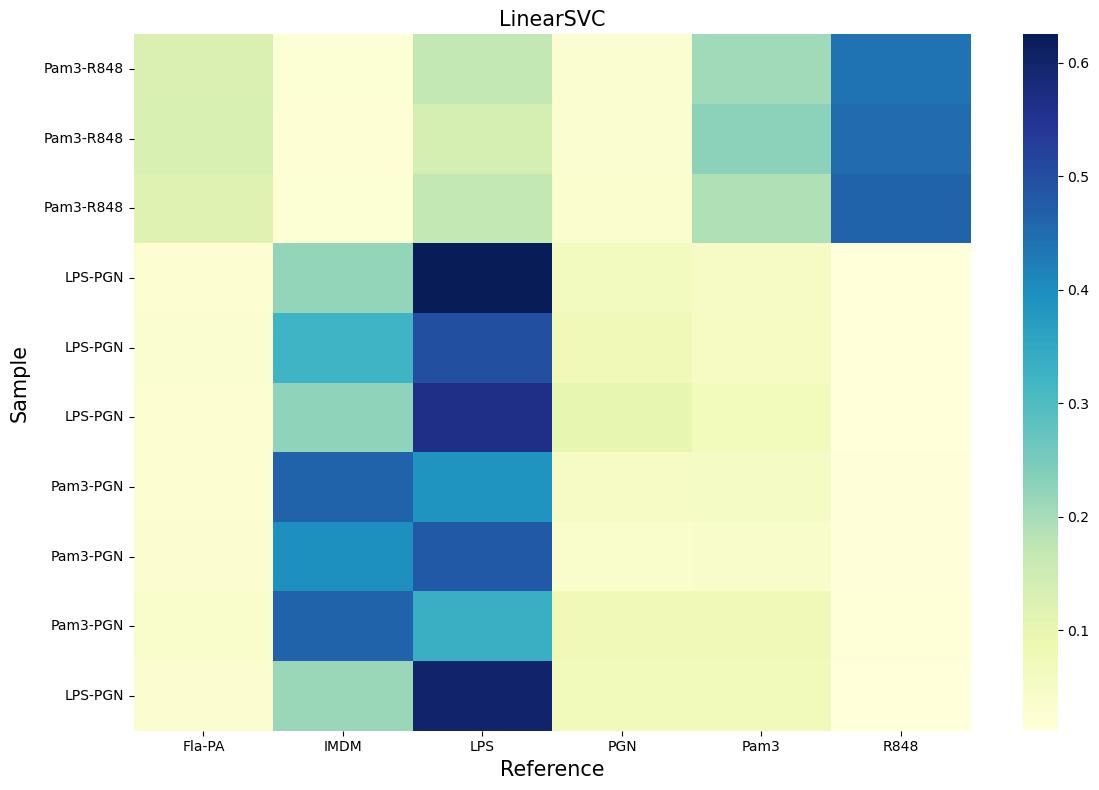

MLPClassifier


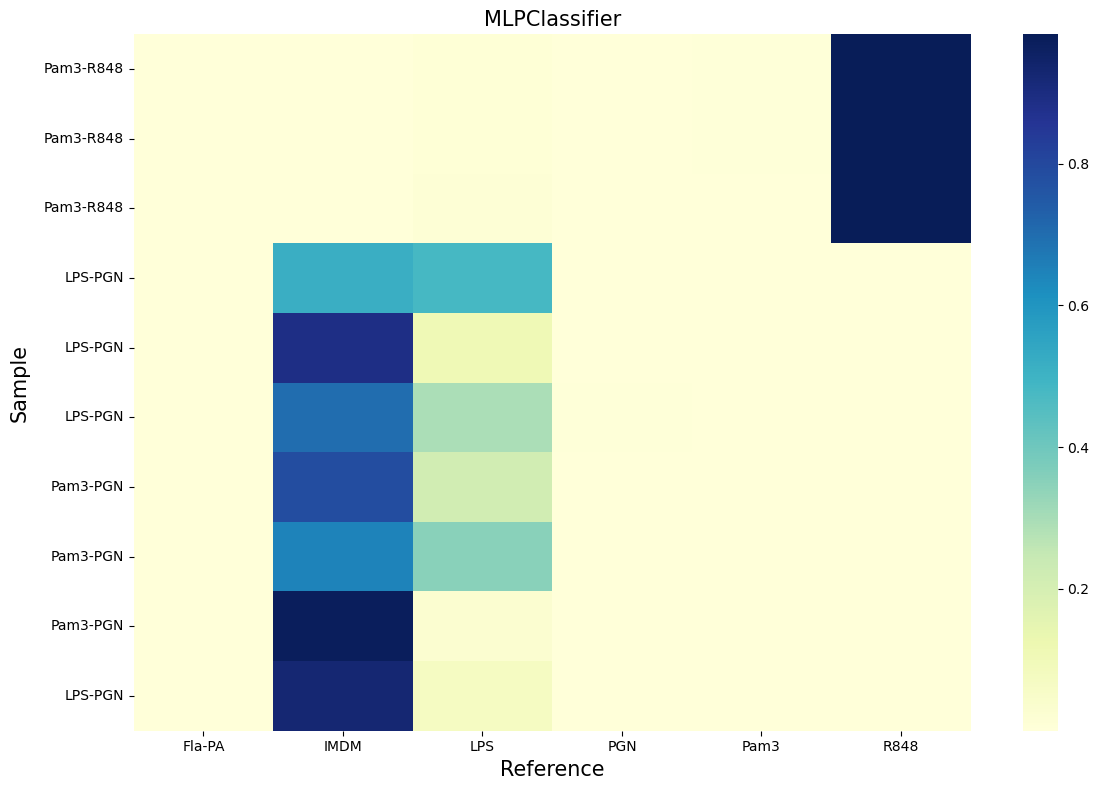

NeuralNetwork
1/1 [==============================] - 0s 70ms/step


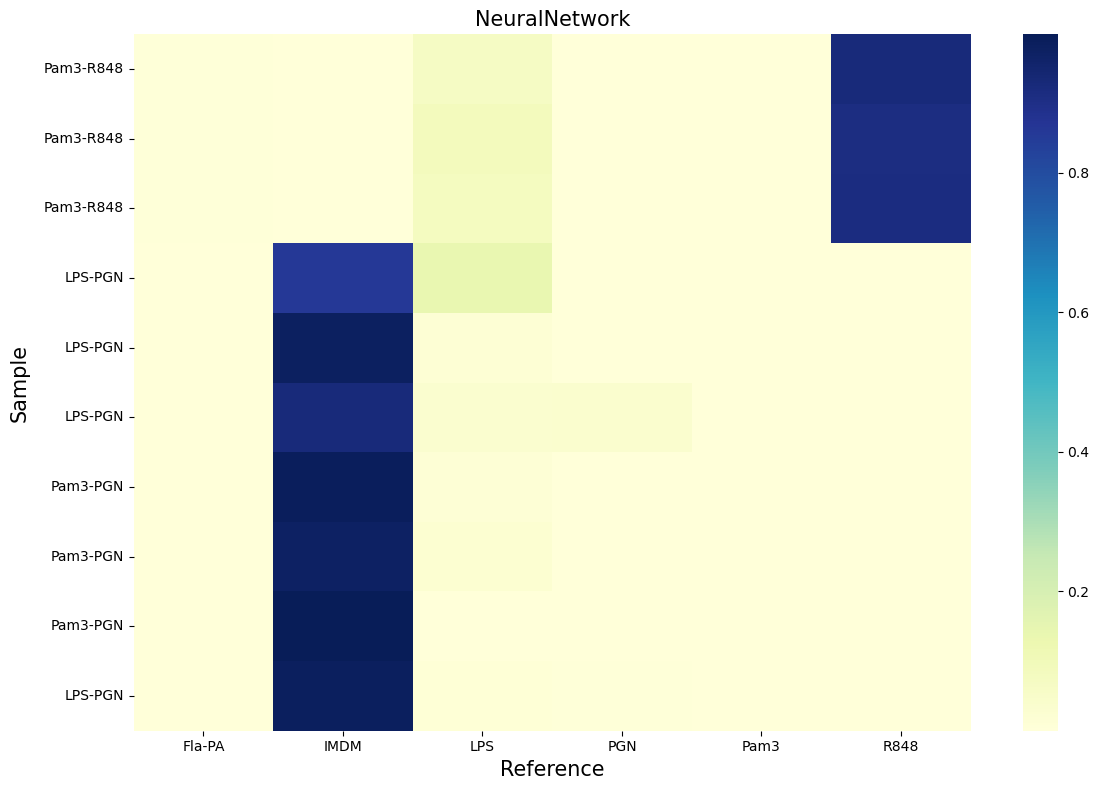

In [31]:

predictions = []
model_names =[]
output = pd.DataFrame()

for name, model in models.items():
    print(f"{name}")
    if name == "NeuralNetwork":
        test_pred = pd.DataFrame(
            model.predict(X_test),
            columns=list(le.classes_),
            index=y_test)
        
       
    else:
        test_pred = pd.DataFrame(
            model.predict_proba(X_test),
            columns=list(le.classes_),
            index=list(y_test))
    
 
    
    plt.figure(figsize=(12, 8))

    heat = sns.heatmap(test_pred, cmap="YlGnBu")
    # Adjust layout for the plot
    heat.set_title(f"{name}", fontsize=15)
    heat.set_xlabel("Reference", fontsize=15)
    heat.set_ylabel("Sample", fontsize=15, labelpad=10)


    plt.savefig(f"{name}__predictions.png", bbox_inches="tight")
    plt.tight_layout()
    plt.show()



In [37]:
le.classes_

array(['Fla-PA', 'IMDM', 'LPS', 'PGN', 'Pam3', 'R848'], dtype=object)

In [33]:
def get_classes_batches(data):
    classes = []
    batches = []
    
    for name in data.index:
        parts = name.split("_")
        classes.append(parts[-2])
        batches.append(parts[1])

    classes = pd.Series(classes, name="class", index=data.index)
    batches = pd.Series(batches, name="batch", index=data.index)

    return classes, batches

In [40]:
sns.set_context(
    "paper",
    rc={
        "font.size": 12,
        "axes.titlesize": 8,
        "axes.labelsize": 12,
        "figure.figsize": (240, 160),
    },
)


custom_palette_12 = [
    "#000000",
    "#8b4513",
    "#006400",
    "#000080",
    "#ff0000",
    "#ffa500",
    "#00ff7f",
    "#00ffff",
    "#ff00ff",
    "#eee8aa",
    "#6495ed",
    "#ff69b4",
]


custom_palette_24 = [
    "#000000",
    "#696969",
    "#8b4513",
    "#808000",
    "#3cb371",
    "#00008b",
    "#8b008b",
    "#ff4500",
    "#ffa500",
    "#ffff00",
    "#7fff00",
    "#00ff7f",
    "#4169e1",
    "#dc143c",
    "#00ffff",
    "#00bfff",
    "#0000ff",
    "#d8bfd8",
    "#ff00ff",
    "#db7093",
    "#f0e68c",
    "#ff1493",
    "#ffa07a",
    "#ee82ee",
]

In [73]:
from sklearn.preprocessing import StandardScaler
contains_str='HKSA|HKEB|Fla-PA|IMDM|LPS|PGN|Pam3|R848|Pam3-PGN|LPS-PGN|Pam3-R848'
scaler = StandardScaler()

df_subset = data[data.index.str.contains(contains_str)]


In [74]:
df_subset.shape

(181, 47698)

In [78]:
df_subset = df_subset.drop(labels='MD215_7115_Pam3_2', axis=0)


In [79]:
df_subset.shape

(180, 47698)

In [80]:
normalised_df_subset = scaler.fit_transform(np.log1p(df_subset.apply(lambda x: (x / (x.sum() if x.sum() != 0 else 1)) * 1000000, axis=1)))

In [70]:
from sklearn.decomposition import PCA
sklearn.set_config(transform_output="pandas")

pca = PCA(n_components=2)

In [81]:
classes, batches = get_classes_batches(df_subset)
data_pca = pca.fit_transform(normalised_df_subset)


In [ ]:
data_pca.pca1.idxmax

/tmp/ipykernel_3333268/785901927.py:1: UserWarning: 
The palette list has fewer values (12) than needed (14) and will cycle, which may produce an uninterpretable plot.
  scatter = sns.scatterplot(


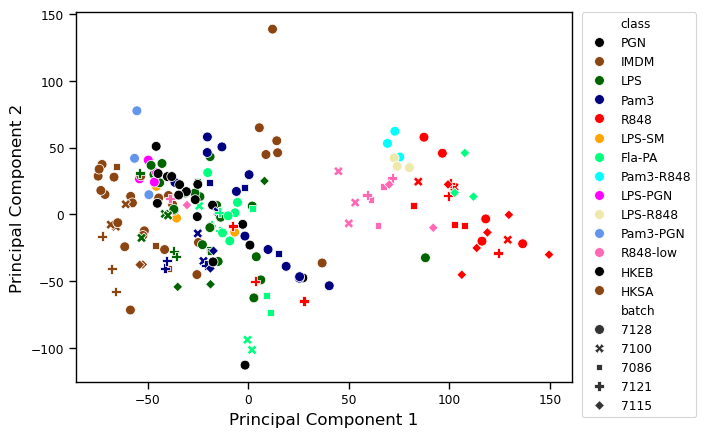

In [82]:
scatter = sns.scatterplot(
    x=data_pca.pca0,
    y=data_pca.pca1,
    hue=classes,
    style=batches,
    palette=custom_palette_12,
    s=50,
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

/tmp/ipykernel_3333268/785901927.py:1: UserWarning: 
The palette list has fewer values (12) than needed (14) and will cycle, which may produce an uninterpretable plot.
  scatter = sns.scatterplot(


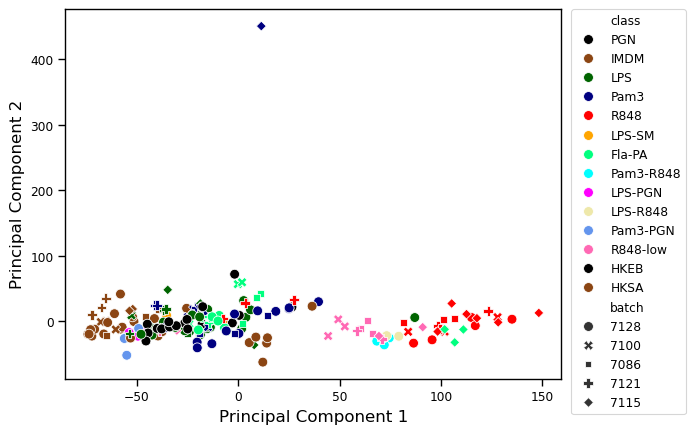

In [64]:
scatter = sns.scatterplot(
    x=data_pca.pca0,
    y=data_pca.pca1,
    hue=classes,
    style=batches,
    palette=custom_palette_12,
    s=50,
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)